In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from six.moves import urllib

import warnings

warnings.filterwarnings("ignore")

%matplotlib inline
import mysql.connector as connection

In [14]:
download_dir ="./data/"


download_url = "https://raw.githubusercontent.com/mohitmahiyt/CarPricePredictionDataset/main/cars_dataset.csv"

os.makedirs(download_dir, exist_ok=True)
file_name = os.path.basename(download_url)
print(file_name)

download_file = os.path.join(download_dir, file_name)
print(download_file)

urllib.request.urlretrieve(download_url, download_file)

cars_dataset.csv
./data/cars_dataset.csv


('./data/cars_dataset.csv', <http.client.HTTPMessage at 0x26d9db21820>)

In [15]:
df = pd.read_csv(download_file)
df

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,1,Maruti Alto,Maruti,Alto,9,53800,Dealer,CNG,Manual,26.83,796,38.4,5,235000
1,2,Maruti Alto,Maruti,Alto,11,11000,Dealer,CNG,Manual,26.83,796,38.4,5,185000
2,3,Maruti Alto,Maruti,Alto,11,80000,Dealer,CNG,Manual,26.83,796,38.4,5,150000
3,4,Maruti Alto,Maruti,Alto,10,57000,Dealer,CNG,Manual,26.83,796,38.4,5,172000
4,5,Maruti Alto,Maruti,Alto,11,72000,Individual,CNG,Manual,26.83,796,38.4,5,125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,30016,Bentley Continental,Bentley,Continental,10,30000,Dealer,Petrol,Automatic,8.60,5998,552.0,4,8100000
15407,30017,Rolls-Royce Ghost,Rolls-Royce,Ghost,4,5000,Individual,Petrol,Automatic,10.20,6592,563.0,4,24200000
15408,30018,Bentley Continental,Bentley,Continental,9,37500,Dealer,Petrol,Automatic,6.00,5998,600.0,5,5200000
15409,30019,Ferrari GTC4Lusso,Ferrari,GTC4Lusso,2,3800,Dealer,Petrol,Automatic,4.00,3855,601.0,4,39500000


In [16]:
df =df.drop("Unnamed: 0", axis=1)
df

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,53800,Dealer,CNG,Manual,26.83,796,38.4,5,235000
1,Maruti Alto,Maruti,Alto,11,11000,Dealer,CNG,Manual,26.83,796,38.4,5,185000
2,Maruti Alto,Maruti,Alto,11,80000,Dealer,CNG,Manual,26.83,796,38.4,5,150000
3,Maruti Alto,Maruti,Alto,10,57000,Dealer,CNG,Manual,26.83,796,38.4,5,172000
4,Maruti Alto,Maruti,Alto,11,72000,Individual,CNG,Manual,26.83,796,38.4,5,125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,Bentley Continental,Bentley,Continental,10,30000,Dealer,Petrol,Automatic,8.60,5998,552.0,4,8100000
15407,Rolls-Royce Ghost,Rolls-Royce,Ghost,4,5000,Individual,Petrol,Automatic,10.20,6592,563.0,4,24200000
15408,Bentley Continental,Bentley,Continental,9,37500,Dealer,Petrol,Automatic,6.00,5998,600.0,5,5200000
15409,Ferrari GTC4Lusso,Ferrari,GTC4Lusso,2,3800,Dealer,Petrol,Automatic,4.00,3855,601.0,4,39500000


create database;

In [17]:
try:
    conn=connection.connect(host = "localhost", user="root", password="Tisha@17")
    query="create database if not exists car_database;"
    cursor=conn.cursor()
    cursor.execute(query)
    conn.commit()
except Exception as e:
    print(e)
else:
    print("Database created sucessfully")
finally:
    conn.close()


Database created sucessfully


In [18]:
try:
    conn=connection.connect(host = "localhost", user="root", password="Tisha@17", database="car_database")
    query="""create table if not exists car_dataset ( car_name varchar(30),
    brand varchar(30),model varchar(30),vehicle_age int,km_driven bigint,seller_type varchar(30),
    fuel_type varchar(30),transmission_type varchar(30),mileage float,engine int,max_power float,seats int,selling_price bigint);"""
    cursor=conn.cursor()
    cursor.execute(query)
    conn.commit()
except Exception as e:
    print(e)
else:
    print("Table created sucessfully")
finally:
    conn.close()


Table created sucessfully


In [19]:
list(df.iterrows())

[(0,
  car_name             Maruti Alto
  brand                     Maruti
  model                       Alto
  vehicle_age                    9
  km_driven                  53800
  seller_type               Dealer
  fuel_type                    CNG
  transmission_type         Manual
  mileage                    26.83
  engine                       796
  max_power                   38.4
  seats                          5
  selling_price             235000
  Name: 0, dtype: object),
 (1,
  car_name             Maruti Alto
  brand                     Maruti
  model                       Alto
  vehicle_age                   11
  km_driven                  11000
  seller_type               Dealer
  fuel_type                    CNG
  transmission_type         Manual
  mileage                    26.83
  engine                       796
  max_power                   38.4
  seats                          5
  selling_price             185000
  Name: 1, dtype: object),
 (2,
  car_name           

In [ ]:
def dataframetosql(mydb_connector,dataframe):
    query = f"delete from car_dataset;"
    cursor = mydb_connector.cursor()
    cursor.execute(query)
    mydb_connector.commit()
    print(len(dataframe.columns))
    for (key, value) in dataframe.iterrows():
        
        car_name = value[0]
        brand = value[1]
        model = value[2]
        vehicle_age = value[3]
        km_driven = value[4]
        seller_type = value[5]
        fuel_type = value[6]
        transmission_type = value[7]
        mileage = value[8]
        engine = value[9]
        max_power = value[10]
        seats = value[11]
        selling_price = value[12]
        
        query = f"INSERT INTO car_dataset VALUES('{car_name}','{brand}','{model}',{vehicle_age},{km_driven},'{seller_type}','{fuel_type}','{transmission_type}',{mileage},{engine},{max_power},{seats},{selling_price});"

        cursor = mydb_connector.cursor()
        cursor.execute(query)
    mydb_connector.commit()

try:
    mydb = connection.connect(host = "localhost", user="root", password="Tisha@17", database = "car_database")
    print(mydb.is_connected())
    if mydb.is_connected():
        dataframetosql(mydb, df)
        print("data inserted successfully")
except Exception as e:
    print(e)

True
13
data inserted successfully


In [20]:
df

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,53800,Dealer,CNG,Manual,26.83,796,38.4,5,235000
1,Maruti Alto,Maruti,Alto,11,11000,Dealer,CNG,Manual,26.83,796,38.4,5,185000
2,Maruti Alto,Maruti,Alto,11,80000,Dealer,CNG,Manual,26.83,796,38.4,5,150000
3,Maruti Alto,Maruti,Alto,10,57000,Dealer,CNG,Manual,26.83,796,38.4,5,172000
4,Maruti Alto,Maruti,Alto,11,72000,Individual,CNG,Manual,26.83,796,38.4,5,125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,Bentley Continental,Bentley,Continental,10,30000,Dealer,Petrol,Automatic,8.60,5998,552.0,4,8100000
15407,Rolls-Royce Ghost,Rolls-Royce,Ghost,4,5000,Individual,Petrol,Automatic,10.20,6592,563.0,4,24200000
15408,Bentley Continental,Bentley,Continental,9,37500,Dealer,Petrol,Automatic,6.00,5998,600.0,5,5200000
15409,Ferrari GTC4Lusso,Ferrari,GTC4Lusso,2,3800,Dealer,Petrol,Automatic,4.00,3855,601.0,4,39500000


In [21]:
df.columns

Index(['car_name', 'brand', 'model', 'vehicle_age', 'km_driven', 'seller_type',
       'fuel_type', 'transmission_type', 'mileage', 'engine', 'max_power',
       'seats', 'selling_price'],
      dtype='object')

In [22]:
df.describe()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


In [23]:
df.dtypes

car_name              object
brand                 object
model                 object
vehicle_age            int64
km_driven              int64
seller_type           object
fuel_type             object
transmission_type     object
mileage              float64
engine                 int64
max_power            float64
seats                  int64
selling_price          int64
dtype: object

In [24]:
# filtering the numerical and categorical data using list comprehension

numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print(f'We have {len(numeric_features)} numerical features : {numeric_features}')
print(f'We have {len(categorical_features)} categorical features : {categorical_features}')

We have 7 numerical features : ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']
We have 6 categorical features : ['car_name', 'brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']


In [25]:
for col in categorical_features:
    print((df[col].value_counts(normalize=True)*100).to_string())

car_name
Hyundai i20               5.878918
Maruti Swift Dzire        5.775096
Maruti Swift              5.067809
Maruti Alto               5.048342
Honda City                4.912076
Maruti Wagon R            4.652521
Hyundai Grand             3.763546
Toyota Innova             3.536435
Hyundai Verna             3.192525
Hyundai i10               2.660437
Ford Ecosport             2.426838
Volkswagen Polo           2.420349
Maruti Baleno             2.361949
Honda Amaze               2.348972
Maruti Ciaz               2.245150
Maruti Ertiga             2.225683
Hyundai Creta             2.180261
Mahindra XUV500           2.141328
Renault KWID              1.985595
Maruti Vitara             1.914217
Mahindra Scorpio          1.771462
Ford Figo                 1.758484
Volkswagen Vento          1.602751
Maruti Celerio            1.537863
Renault Duster            1.414574
Mahindra Bolero           1.369152
Toyota Fortuner           1.213419
Skoda Rapid               1.180975
Honda Jazz 

In [26]:
# propotion of each unique value in categorical variable

for col in categorical_features:
    print(df[col].value_counts(normalize=True)*100)
    print()
    print("---"*50)
    print()

car_name
Hyundai i20              5.878918
Maruti Swift Dzire       5.775096
Maruti Swift             5.067809
Maruti Alto              5.048342
Honda City               4.912076
                           ...   
Maserati Quattroporte    0.006489
Maserati Ghibli          0.006489
Mercedes-AMG C           0.006489
Rolls-Royce Ghost        0.006489
Ferrari GTC4Lusso        0.006489
Name: proportion, Length: 121, dtype: float64

------------------------------------------------------------------------------------------------------------------------------------------------------

brand
Maruti           32.392447
Hyundai          19.349815
Honda             9.635974
Mahindra          6.560249
Toyota            5.145675
Ford              5.126209
Volkswagen        4.023100
Renault           3.478035
BMW               2.848615
Tata              2.790215
Mercedes-Benz     2.186750
Skoda             2.167283
Audi              1.245863
Datsun            1.103108
Jaguar            0.382843
Land Ro

# Univariate Analysis
* The term univariate analysis refers to the analysis of one variable prefix "uni" means "one". The purpose of univariate analysis is to understand the distribution of values for a single variable.

**Note=> Explaination=> if you need to analyze the specific feature and not compare with any other features as such. then it is said to be Univariate analysis.**

#### Numerical features

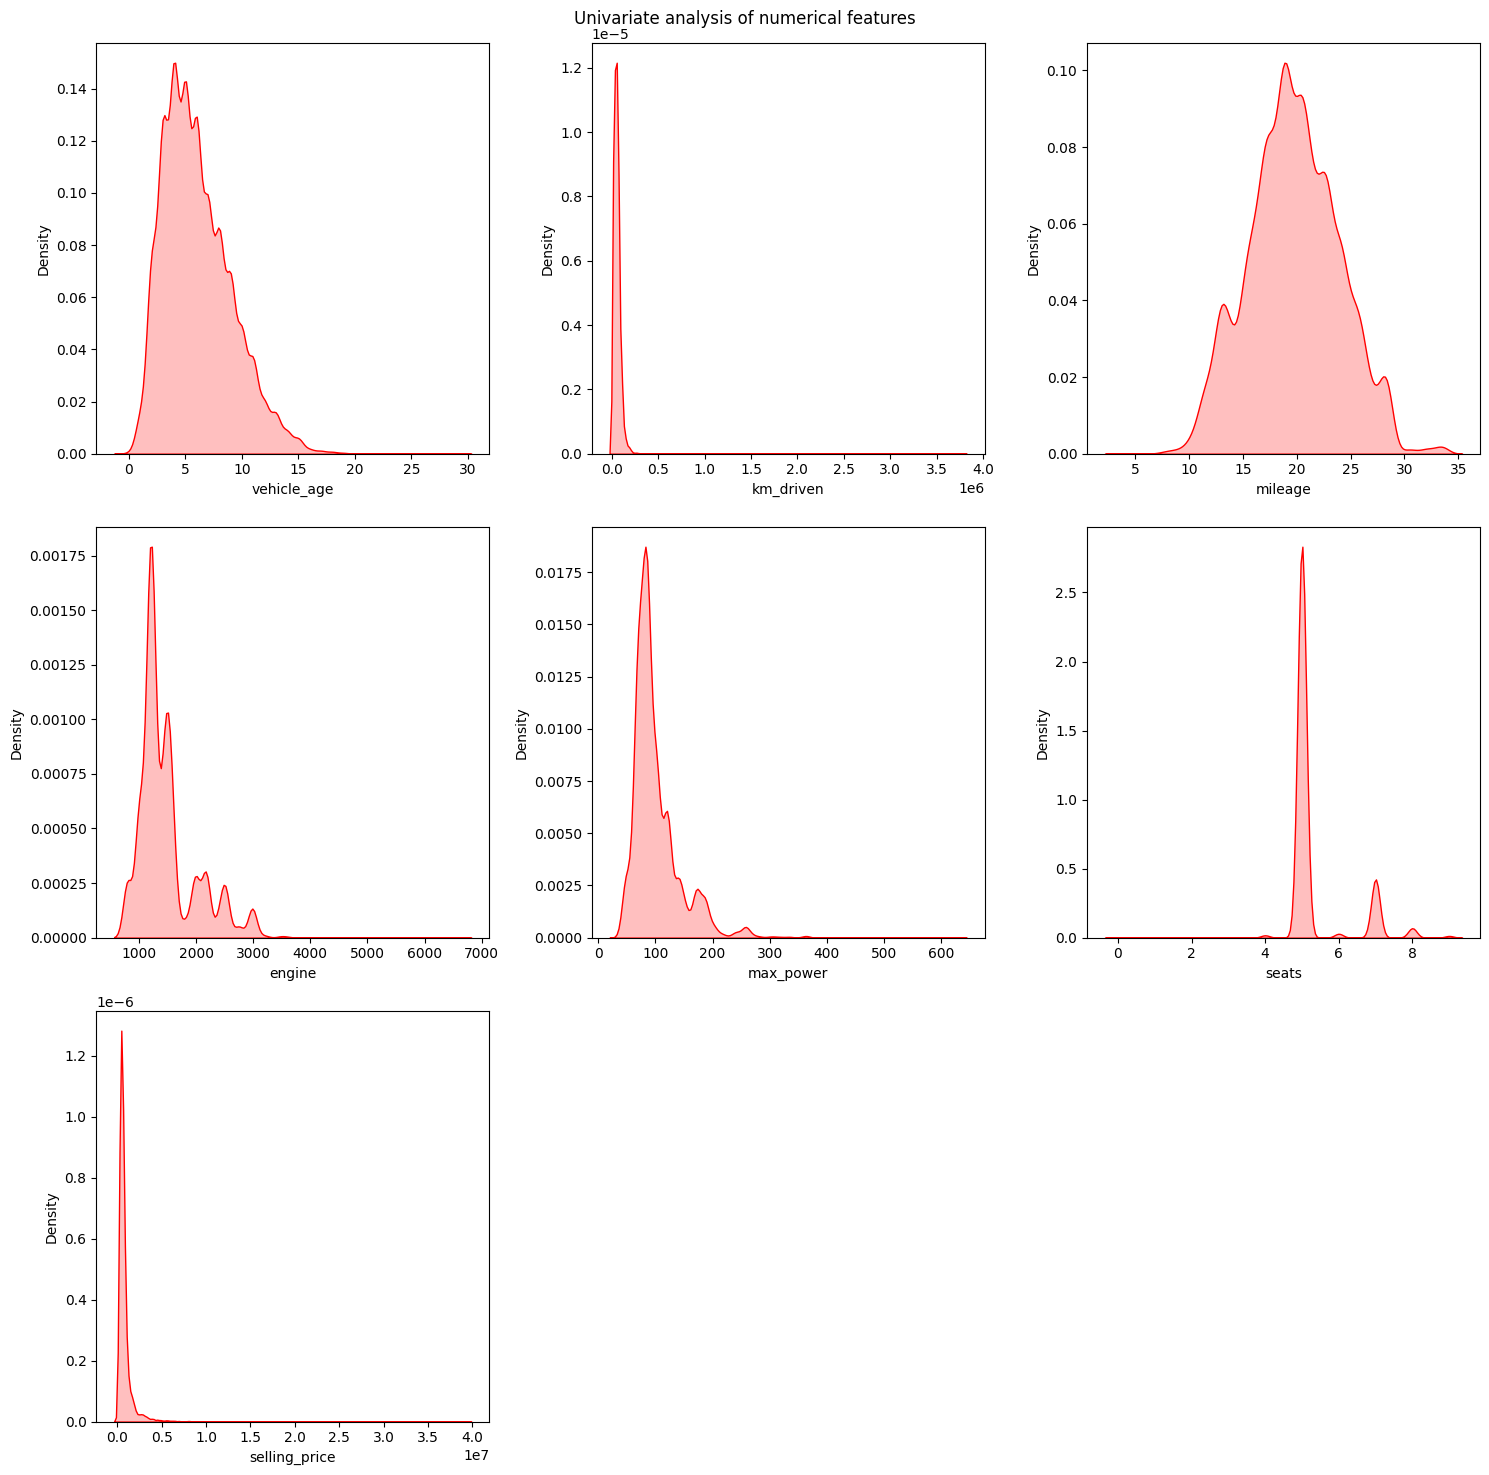

In [28]:
plt.figure(figsize=(15,15))
plt.suptitle("Univariate analysis of numerical features")

for i in range(len(numeric_features)):
    plt.subplot(3,3,i+1)
    #sns.histplot(x= df[numeric_features[i]],kde=True)
    sns.kdeplot(x= df[numeric_features[i]], color='r', shade=True)
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

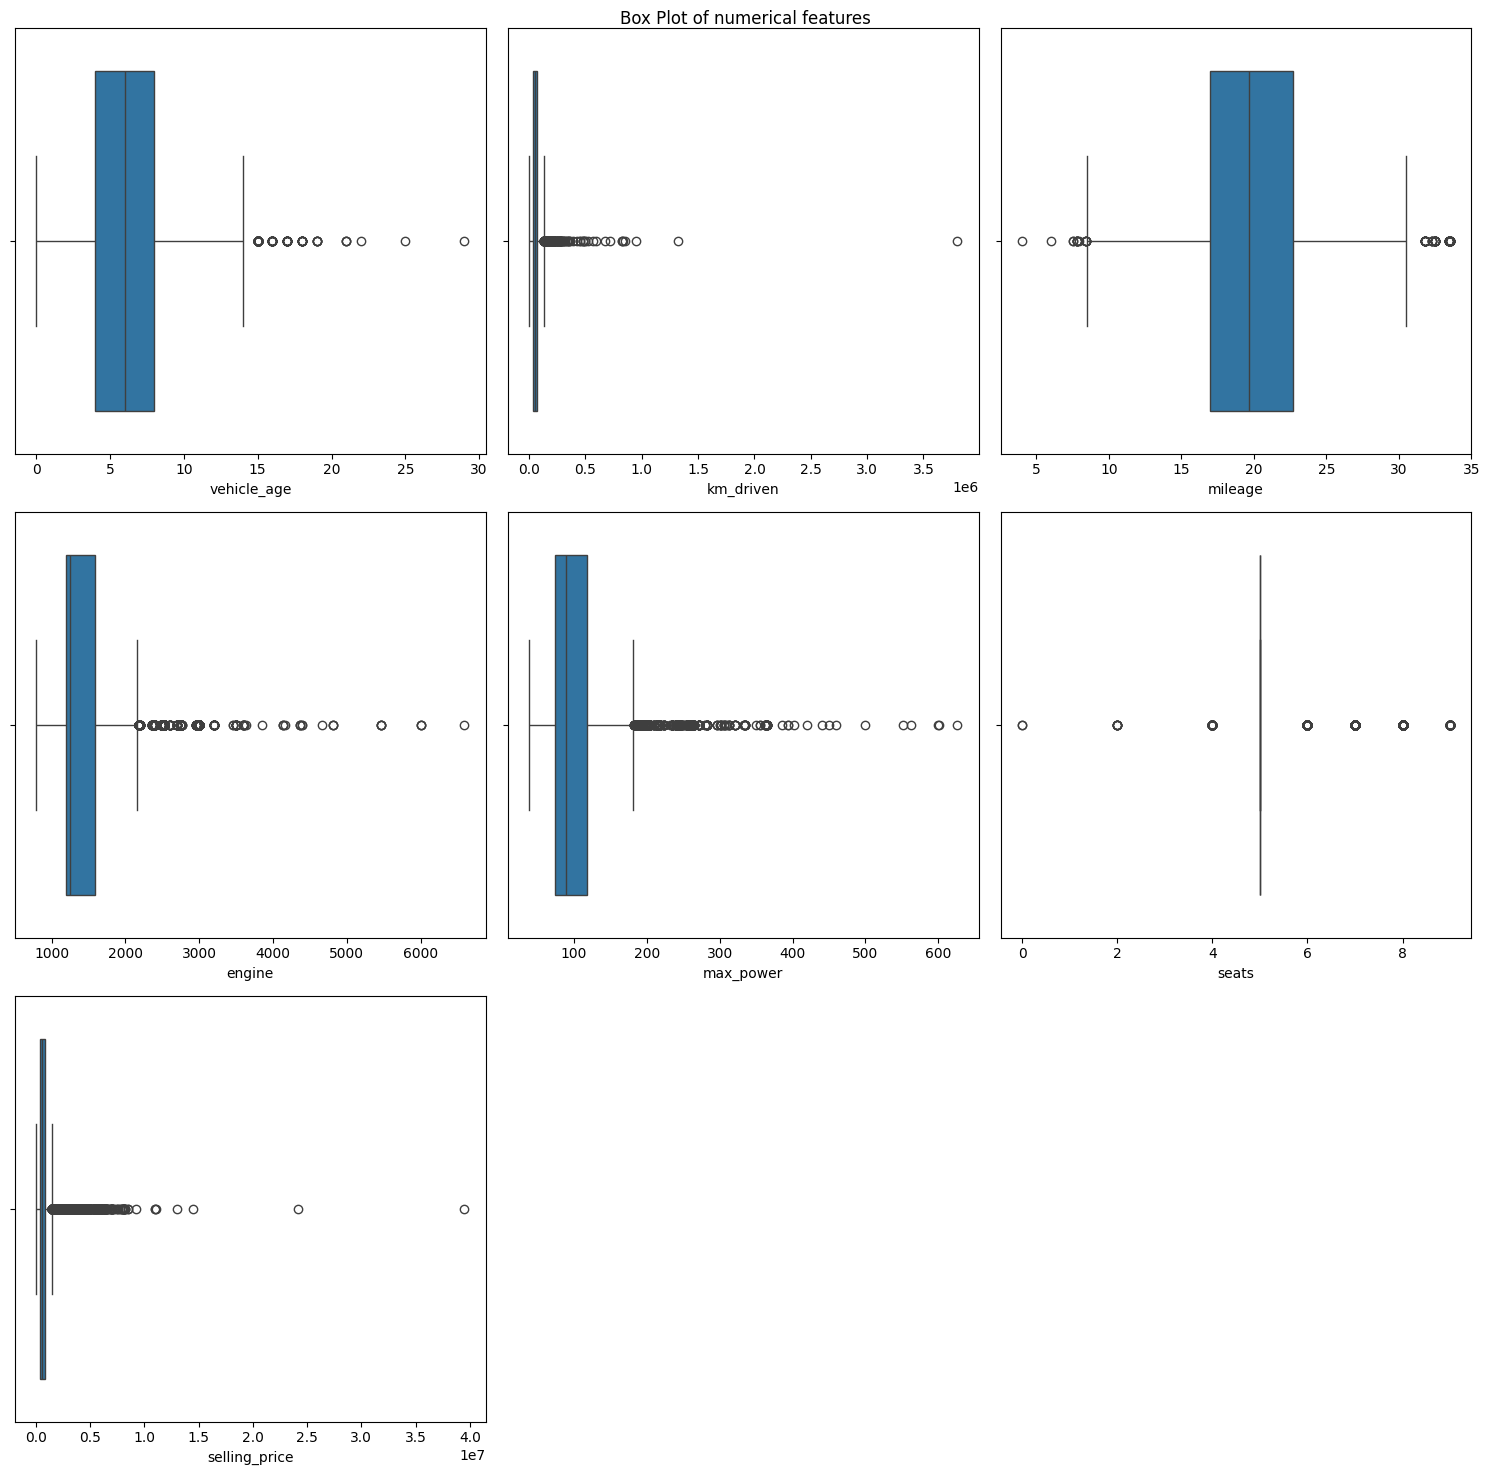

In [29]:
plt.figure(figsize=(15,15))

plt.suptitle("Box Plot of numerical features")

for i in range(len(numeric_features)):
    plt.subplot(3,3,i+1)
    sns.boxplot(x= df[numeric_features[i]])
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

#### categorical features

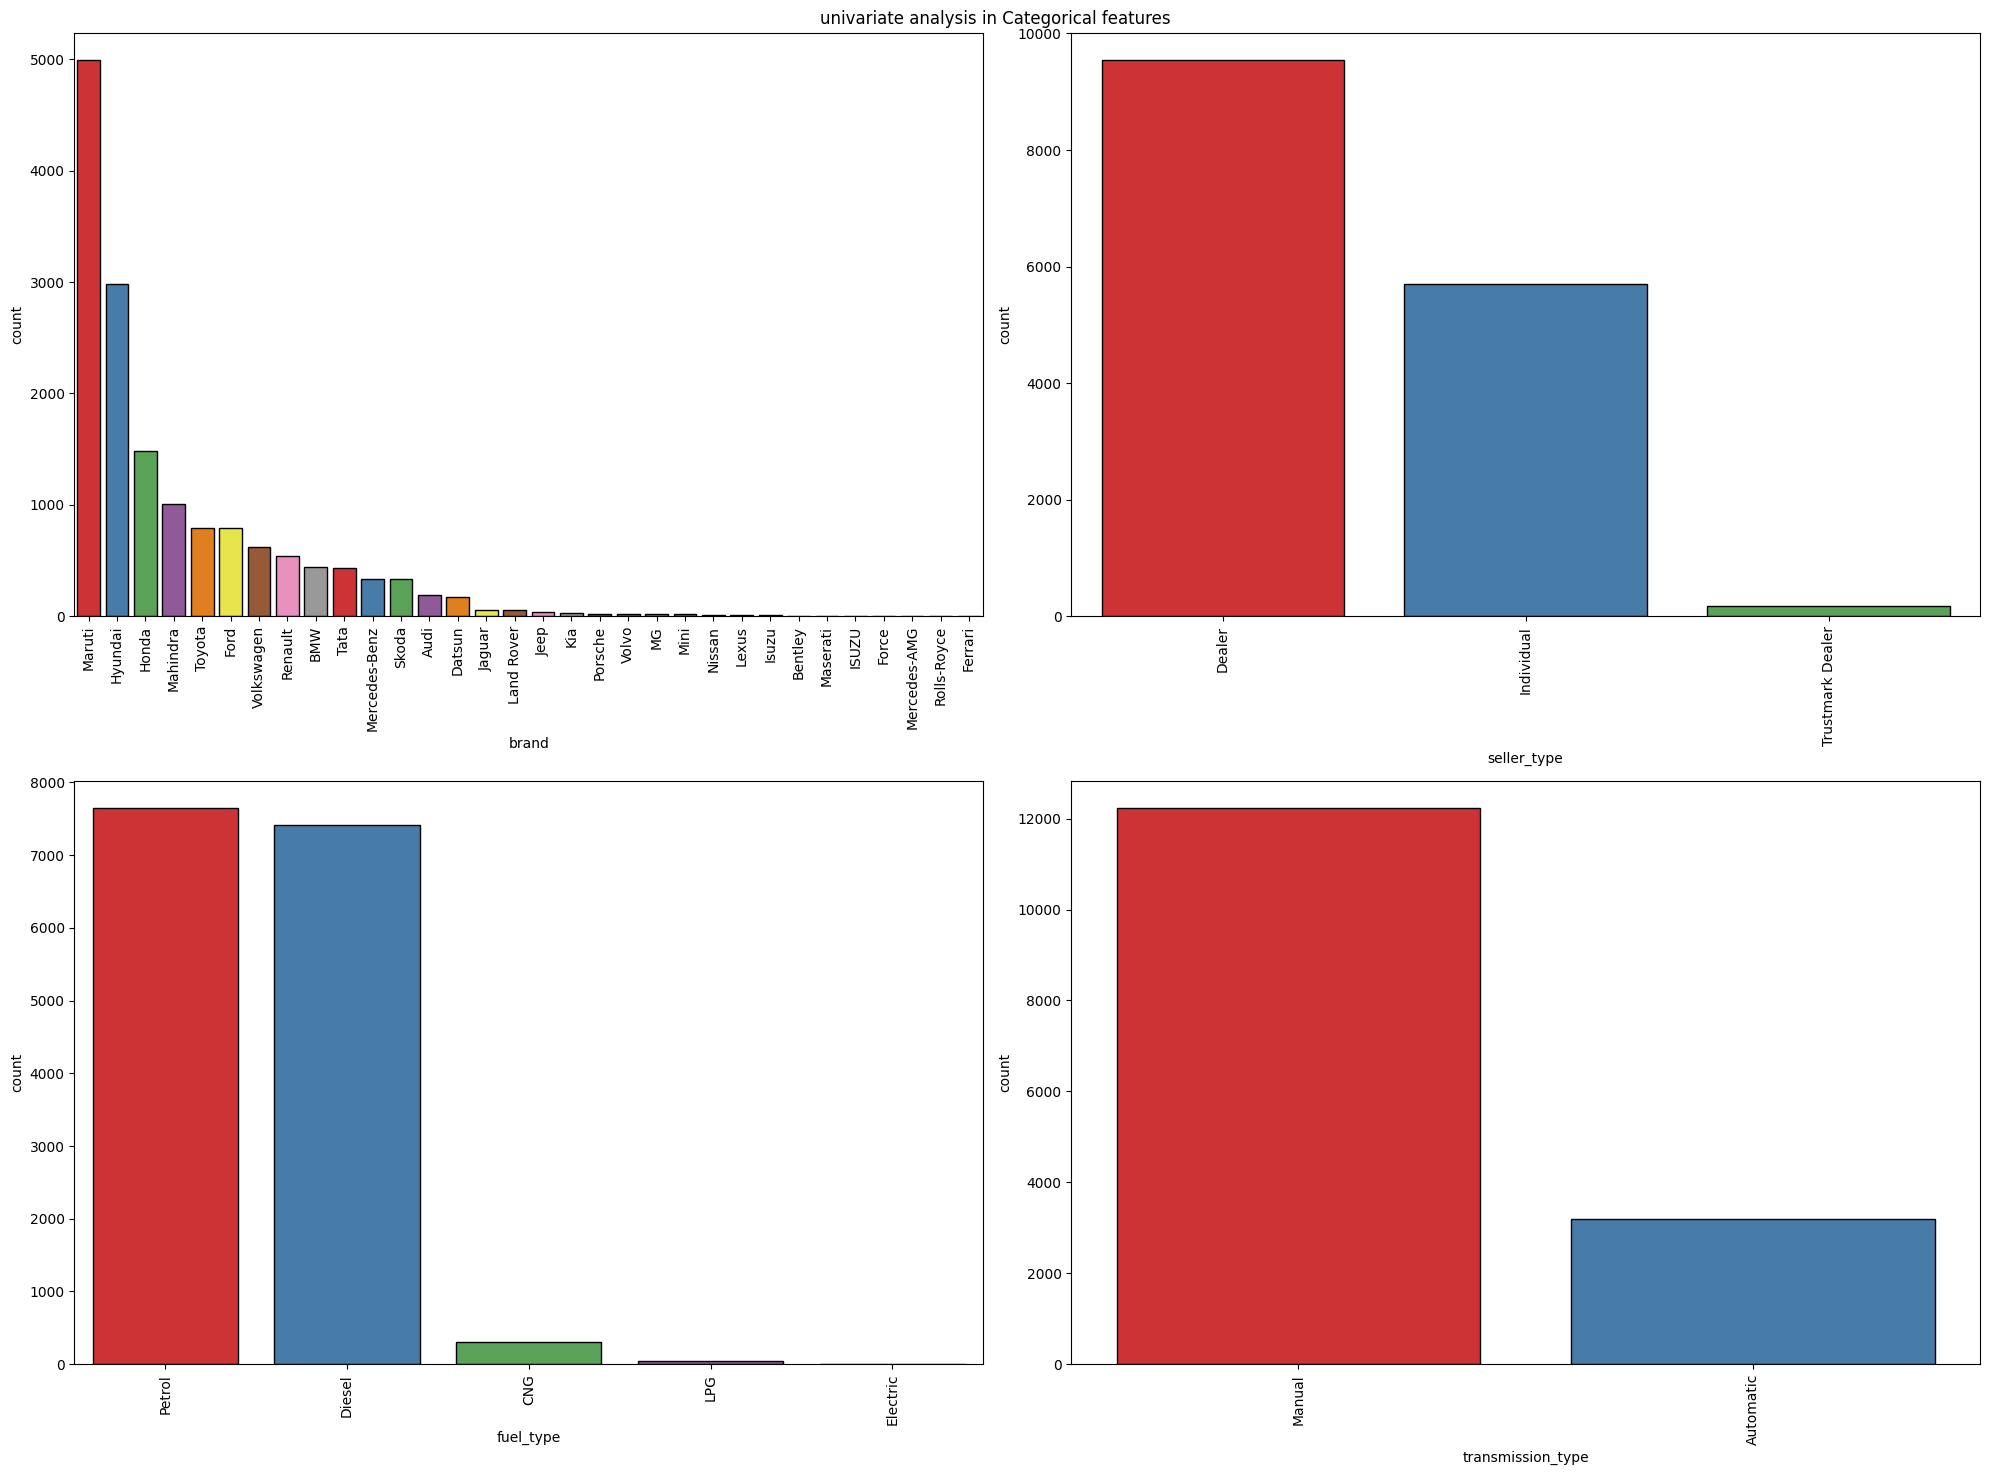

In [30]:
# categorical features
plt.figure(figsize= (20,15))
plt.suptitle("univariate analysis in Categorical features")
cat = ["brand", "seller_type", "fuel_type", "transmission_type"]
for i in range(len(cat)) :
    plt.subplot(2,2,i+1)
    sns.countplot(x=df[cat[i]], palette="Set1", edgecolor = "black", order=df[cat[i]].value_counts().index)
    plt.xticks(rotation=90)
    plt.xlabel(cat[i])
    plt.tight_layout()

<Axes: >

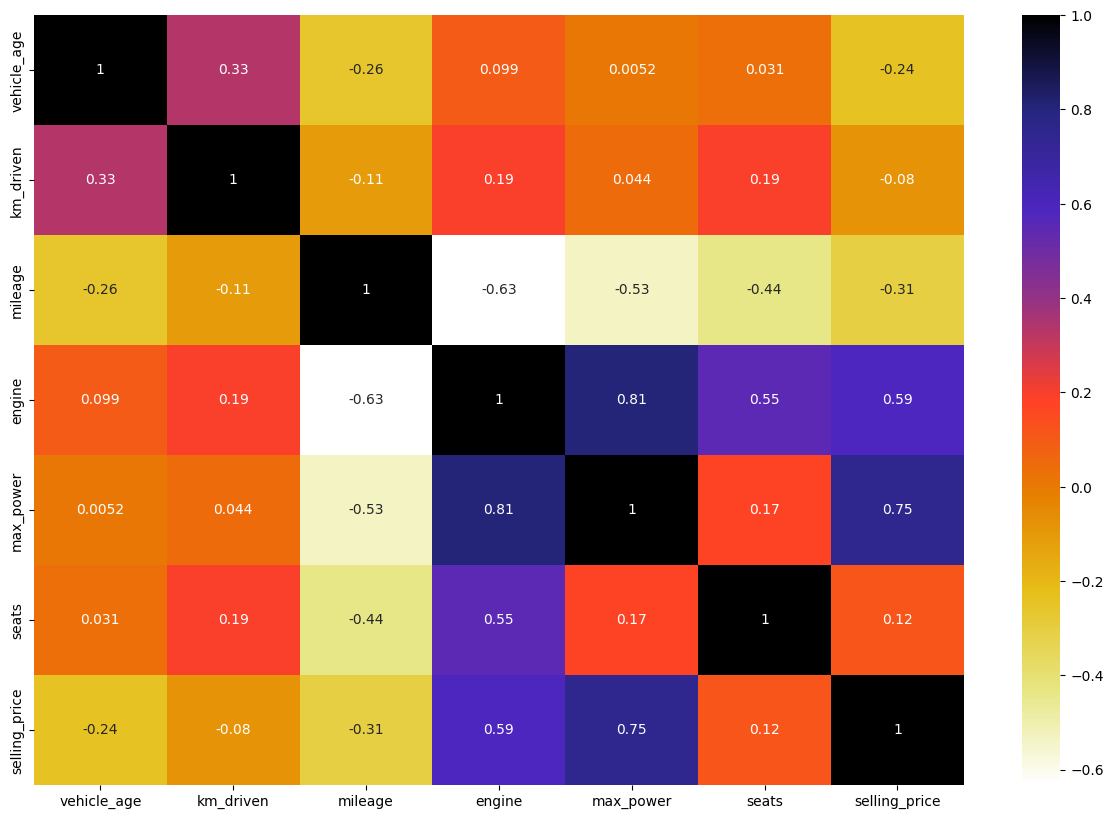

In [31]:
plt.figure(figsize = (15,10))
#sns.heatmap(df.corr(), cmap="CMRmap_r", annot=True)
sns.heatmap(df[numeric_features].corr(), annot=True, cmap="CMRmap_r")

# Checking the Outliers


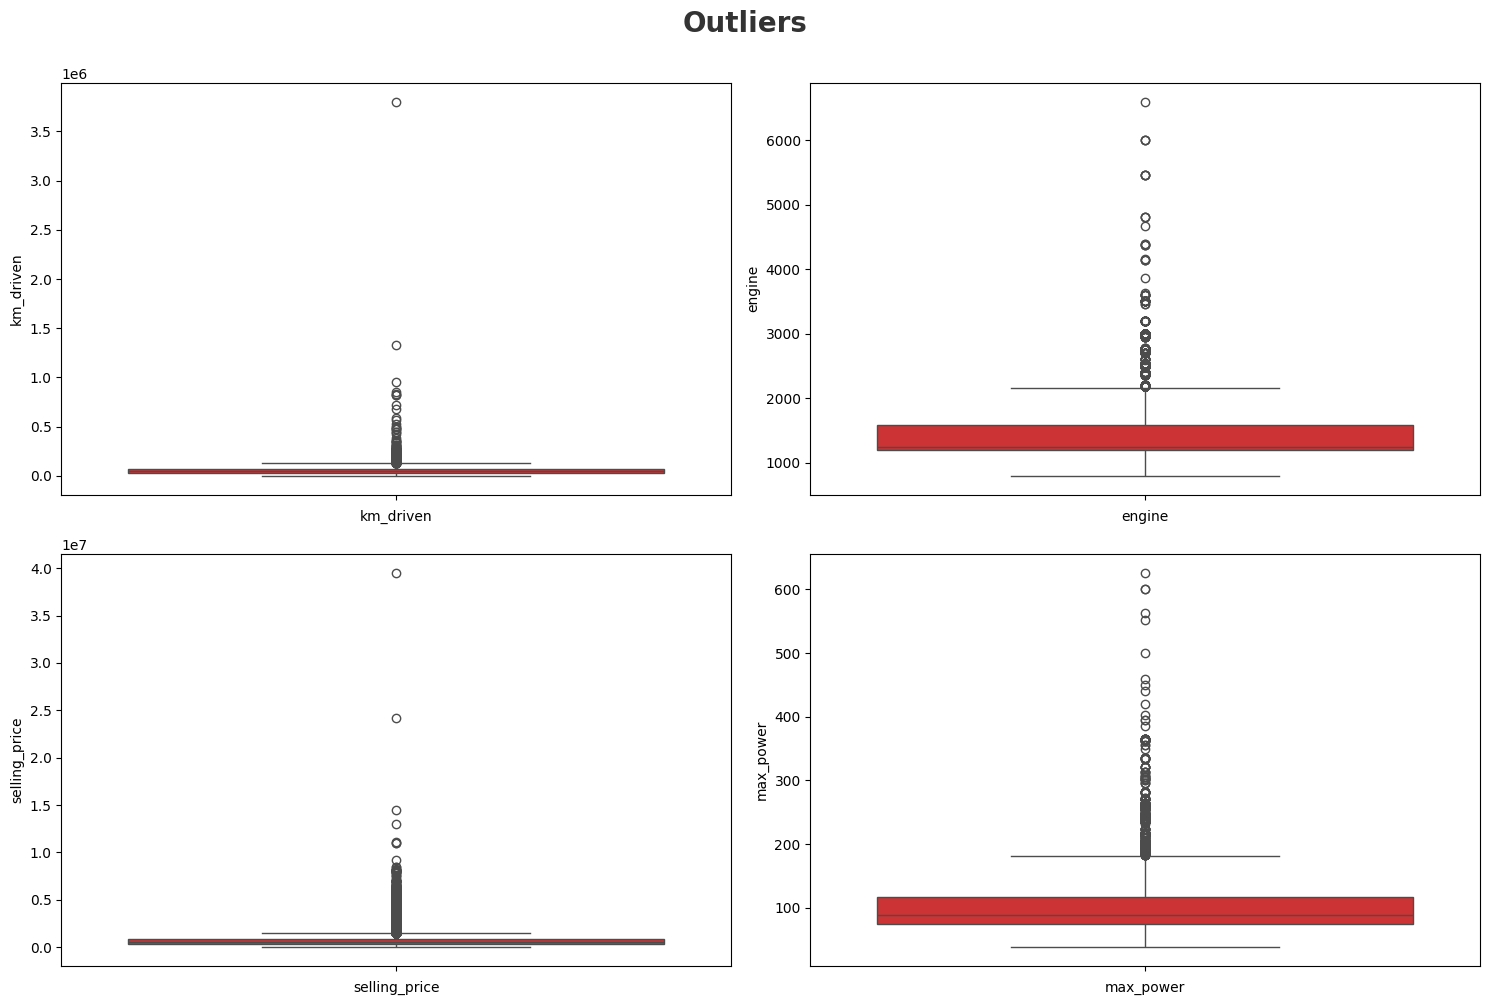

In [32]:
plt.figure(figsize=(15,10))
plt.suptitle("Outliers", fontsize=20, fontweight="bold",alpha=0.8,y=1)

outliers= ['km_driven', 'engine', 'selling_price','max_power']
# outliers= numeric_features
for i in range(len(outliers)):
    #plt.subplot(4,2,i+1)
    plt.subplot(2,2,i+1)
    sns.boxplot(df[outliers[i]],palette="Set1")
    plt.xlabel(outliers[i])
    plt.tight_layout()

# insights from the data visualization

Selling price distribution

(0.0, 3000000.0)

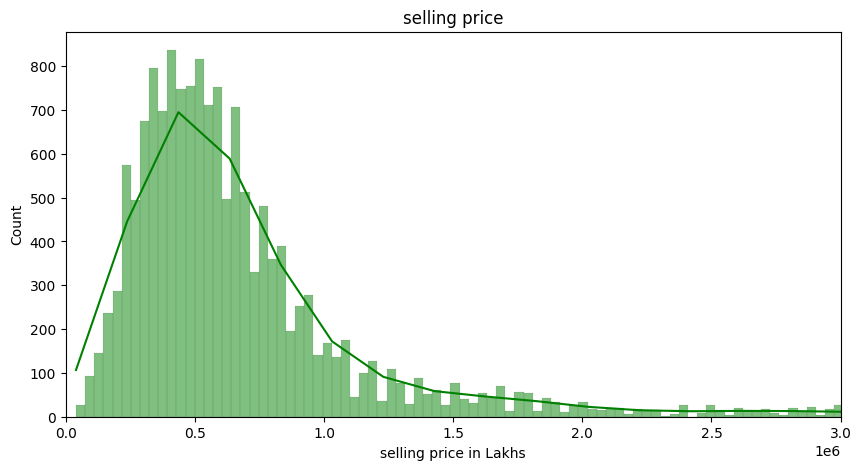

In [33]:
plt.figure(figsize=(10,5))
sns.histplot(df["selling_price"], kde=True,color='g')
plt.title("selling price")
plt.xlabel('selling price in Lakhs')
plt.xlim(0,3000000)

# most cars sold on dataset


In [35]:
df["car_name"].value_counts()

car_name
Hyundai i20              906
Maruti Swift Dzire       890
Maruti Swift             781
Maruti Alto              778
Honda City               757
                        ... 
Maserati Quattroporte      1
Maserati Ghibli            1
Mercedes-AMG C             1
Rolls-Royce Ghost          1
Ferrari GTC4Lusso          1
Name: count, Length: 121, dtype: int64

# top 10 most cars sold on cars_dataset


In [36]:
df["car_name"].value_counts().head(10)

car_name
Hyundai i20           906
Maruti Swift Dzire    890
Maruti Swift          781
Maruti Alto           778
Honda City            757
Maruti Wagon R        717
Hyundai Grand         580
Toyota Innova         545
Hyundai Verna         492
Hyundai i10           410
Name: count, dtype: int64

In [37]:
df["car_name"].value_counts().head(10).index

Index(['Hyundai i20', 'Maruti Swift Dzire', 'Maruti Swift', 'Maruti Alto',
       'Honda City', 'Maruti Wagon R', 'Hyundai Grand', 'Toyota Innova',
       'Hyundai Verna', 'Hyundai i10'],
      dtype='object', name='car_name')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Hyundai i20'),
  Text(1, 0, 'Maruti Swift Dzire'),
  Text(2, 0, 'Maruti Swift'),
  Text(3, 0, 'Maruti Alto'),
  Text(4, 0, 'Honda City'),
  Text(5, 0, 'Maruti Wagon R'),
  Text(6, 0, 'Hyundai Grand'),
  Text(7, 0, 'Toyota Innova'),
  Text(8, 0, 'Hyundai Verna'),
  Text(9, 0, 'Hyundai i10')])

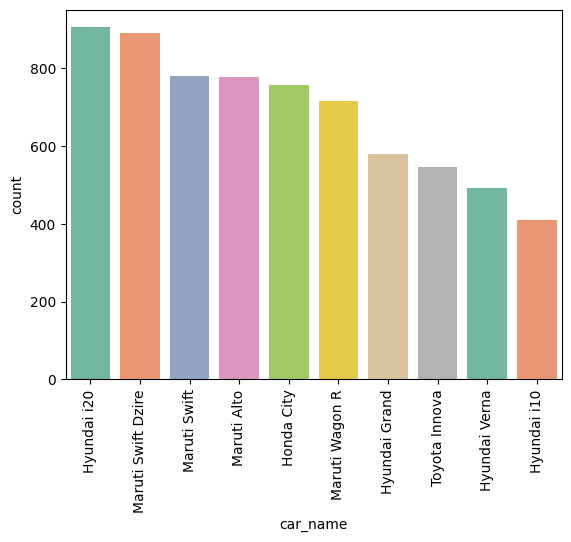

In [38]:
sns.countplot(x="car_name",palette="Set2", data = df, order=df["car_name"].value_counts().head(10).index)
plt.xticks(rotation = 90)

# average price of top selling car

In [40]:
i20 = df[df["car_name"] == 'Hyundai i20']
selling_price_i20 = i20.selling_price.mean()
print("the average mean price of i20 is", selling_price_i20)
av_share_i20 = df["car_name"].value_counts(normalize=True)*100
print("the average share of hyundai i20 is", round(av_share_i20[0],2), "%")

the average mean price of i20 is 543603.7527593819
the average share of hyundai i20 is 5.88 %


# most sold car by brand

In [41]:
df.brand.value_counts().head(10)

brand
Maruti        4992
Hyundai       2982
Honda         1485
Mahindra      1011
Toyota         793
Ford           790
Volkswagen     620
Renault        536
BMW            439
Tata           430
Name: count, dtype: int64

<Axes: xlabel='brand', ylabel='count'>

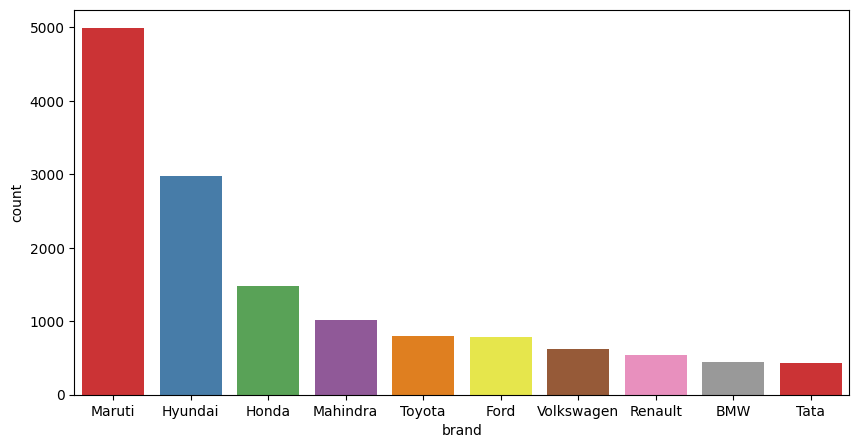

In [42]:
plt.figure(figsize=(10,5))
sns.countplot(x = "brand", data = df, palette="Set1",order=df["brand"].value_counts().head(10).index)

In [44]:
# average mean of maruti brand

maruti = df[df['brand'] == "Maruti"]
maruti["selling_price"].mean()


15409    Ferrari
Name: brand, dtype: object

# Top most costlier brand on dataset


In [45]:
df[df['selling_price']==(df.groupby('brand').selling_price.max()).max()]['brand']

15409    Ferrari
Name: brand, dtype: object

In [51]:
df[df['selling_price']==(df.groupby('brand')['selling_price'].max()).max()]['brand']

15409    Ferrari
Name: brand, dtype: object

# Top 10 most costlier brand on dataset


In [52]:
df.groupby('brand').selling_price.max().sort_values(ascending=False).head(10)


brand
Ferrari          39500000
Rolls-Royce      24200000
Bentley          14500000
Mercedes-Benz    13000000
Porsche          11100000
Land Rover        9200000
BMW               8500000
Volvo             8195000
Lexus             8000000
Audi              6800000
Name: selling_price, dtype: int64

In [53]:
max_brand_price= df.groupby('brand').selling_price.max()
top_10_expensive_cars=max_brand_price.sort_values(ascending=False).head(10)
top_10_expensive_cars

brand
Ferrari          39500000
Rolls-Royce      24200000
Bentley          14500000
Mercedes-Benz    13000000
Porsche          11100000
Land Rover        9200000
BMW               8500000
Volvo             8195000
Lexus             8000000
Audi              6800000
Name: selling_price, dtype: int64

               selling_price
brand                       
Ferrari             39500000
Rolls-Royce         24200000
Bentley             14500000
Mercedes-Benz       13000000
Porsche             11100000
Land Rover           9200000
BMW                  8500000
Volvo                8195000
Lexus                8000000
Audi                 6800000


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Ferrari'),
  Text(1, 0, 'Rolls-Royce'),
  Text(2, 0, 'Bentley'),
  Text(3, 0, 'Mercedes-Benz'),
  Text(4, 0, 'Porsche'),
  Text(5, 0, 'Land Rover'),
  Text(6, 0, 'BMW'),
  Text(7, 0, 'Volvo'),
  Text(8, 0, 'Lexus'),
  Text(9, 0, 'Audi')])

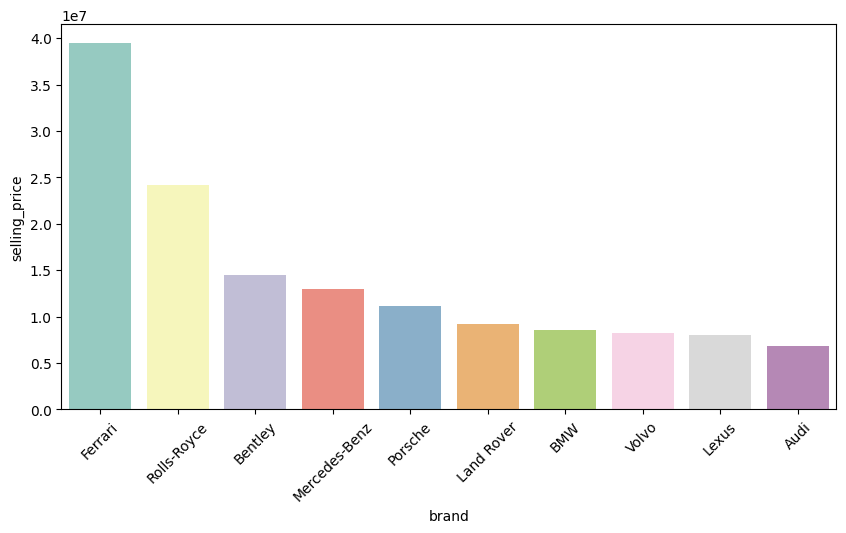

In [54]:
plt.figure(figsize=(10,5))
top_10 = top_10_expensive_cars.to_frame()
print(top_10)
sns.barplot(x = top_10.index, y = top_10['selling_price'], palette='Set3')
plt.xticks(rotation=45)


# Top 10 costlier cars in dataset

In [55]:
car = df.groupby('car_name').selling_price.max()
car = car.to_frame().sort_values('selling_price',ascending=False)[:10]
car

,selling_price
car_name,
Ferrari GTC4Lusso,39500000
Rolls-Royce Ghost,24200000
Bentley Continental,14500000
Mercedes-Benz S-Class,13000000
Porsche Cayenne,11100000
Land Rover Rover,9200000
BMW 7,8500000
BMW Z4,8250000
Volvo XC,8195000


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Ferrari GTC4Lusso'),
  Text(1, 0, 'Rolls-Royce Ghost'),
  Text(2, 0, 'Bentley Continental'),
  Text(3, 0, 'Mercedes-Benz S-Class'),
  Text(4, 0, 'Porsche Cayenne'),
  Text(5, 0, 'Land Rover Rover'),
  Text(6, 0, 'BMW 7'),
  Text(7, 0, 'BMW Z4'),
  Text(8, 0, 'Volvo XC'),
  Text(9, 0, 'BMW X5')])

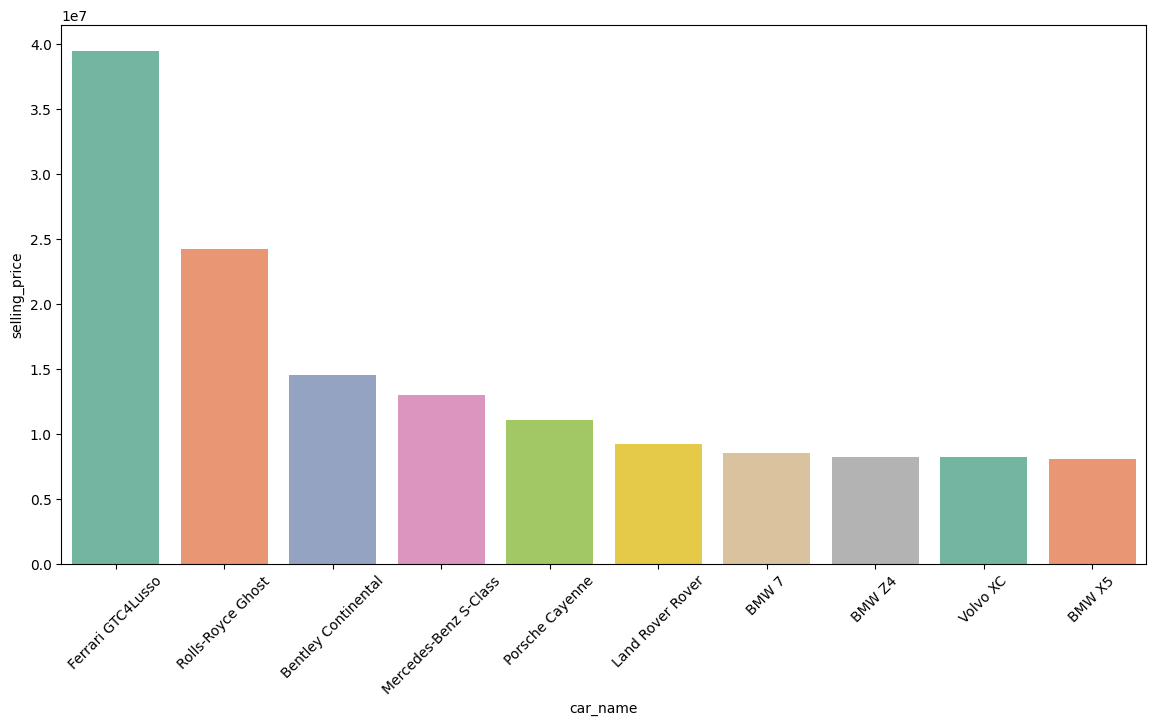

In [56]:
plt.figure(figsize=(14,7))

sns.barplot(x = car.index, y = car['selling_price'], palette="Set2")
plt.xticks(rotation=45)

# Km driven vs vehicle age

(0.0, 1500001.0)

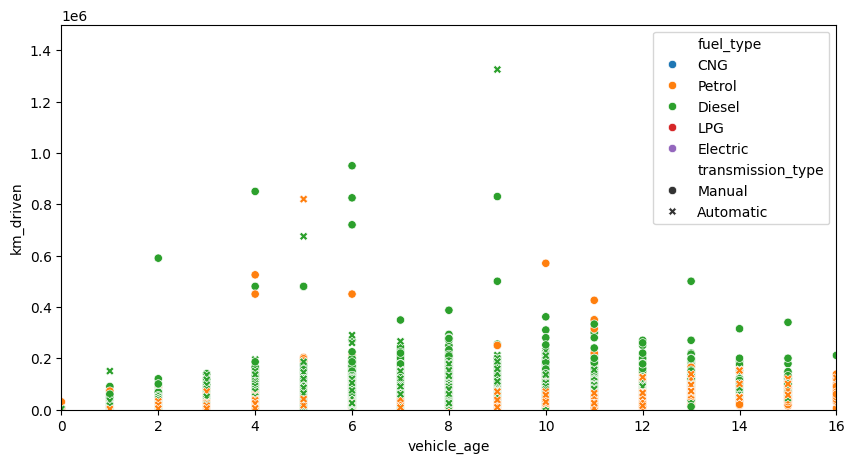

In [59]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['vehicle_age'], y=df['km_driven'],hue=df['fuel_type'], style=df['transmission_type'])
plt.xlim(0,16)
plt.ylim(0,1500001)

# top 10 mileage based on brand on dataset


In [60]:
mileage=df.groupby('brand')['mileage'].mean().sort_values(ascending=False).head(10)
mileage.to_frame()

,mileage
brand,
Maruti,22.430980
Renault,22.099142
Datsun,21.215647
Lexus,20.846000
Ford,19.922620
Honda,19.908795
Maserati,19.820000
Tata,19.755279
Hyundai,19.588776


Text(0, 0.5, 'Mileage in kmpl')

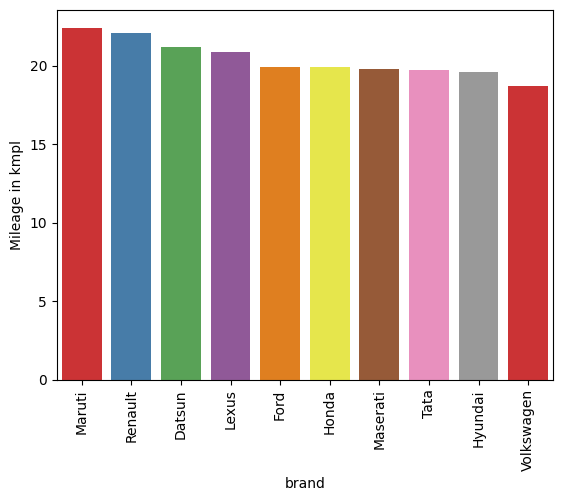

In [61]:
sns.barplot(x=mileage.index,y = mileage.values, palette='Set1')
plt.xticks(rotation= 90)
plt.ylabel('Mileage in kmpl')

# km_driven vs selling price

(-100000.0, 15000000.0)

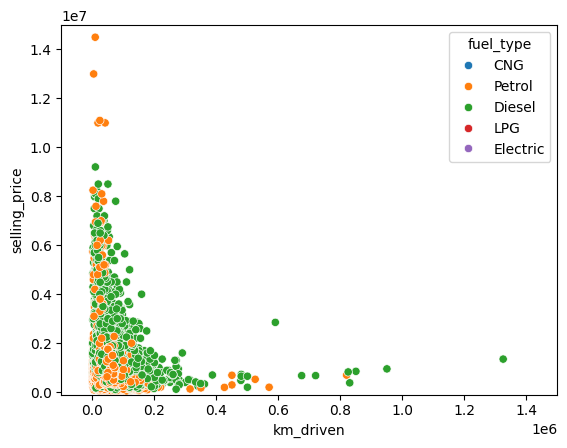

In [62]:
sns.scatterplot(x=df['km_driven'],y=df['selling_price'], data=df, hue="fuel_type")
plt.xlim(-100000,1500000)
plt.ylim(-100000,15000000)

# Brand vs selling price

In [63]:
brand_price= df.groupby('brand').selling_price.mean().sort_values(ascending=False)
brand_price.to_frame()

,selling_price
brand,
Ferrari,3.950000e+07
Rolls-Royce,2.420000e+07
Bentley,9.266667e+06
Maserati,6.100000e+06
Porsche,5.161190e+06
Lexus,5.146500e+06
Mercedes-AMG,5.100000e+06
Land Rover,3.823902e+06
Volvo,3.729700e+06


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31],
 [Text(0, 0, 'Ferrari'),
  Text(1, 0, 'Rolls-Royce'),
  Text(2, 0, 'Bentley'),
  Text(3, 0, 'Maserati'),
  Text(4, 0, 'Porsche'),
  Text(5, 0, 'Lexus'),
  Text(6, 0, 'Mercedes-AMG'),
  Text(7, 0, 'Land Rover'),
  Text(8, 0, 'Volvo'),
  Text(9, 0, 'BMW'),
  Text(10, 0, 'Jaguar'),
  Text(11, 0, 'Mercedes-Benz'),
  Text(12, 0, 'Mini'),
  Text(13, 0, 'Audi'),
  Text(14, 0, 'ISUZU'),
  Text(15, 0, 'Jeep'),
  Text(16, 0, 'MG'),
  Text(17, 0, 'Kia'),
  Text(18, 0, 'Toyota'),
  Text(19, 0, 'Isuzu'),
  Text(20, 0, 'Nissan'),
  Text(21, 0, 'Mahindra'),
  Text(22, 0, 'Skoda'),
  Text(23, 0, 'Force'),
  Text(24, 0, 'Tata'),
  Text(25, 0, 'Ford'),
  Text(26, 0, 'Honda'),
  Text(27, 0, 'Hyundai'),
  Text(28, 0, 'Volkswagen'),
  Text(29, 0, 'Maruti'),
  Text(30, 0, 'Renault'),
  Text(31, 0, 'Datsun')])

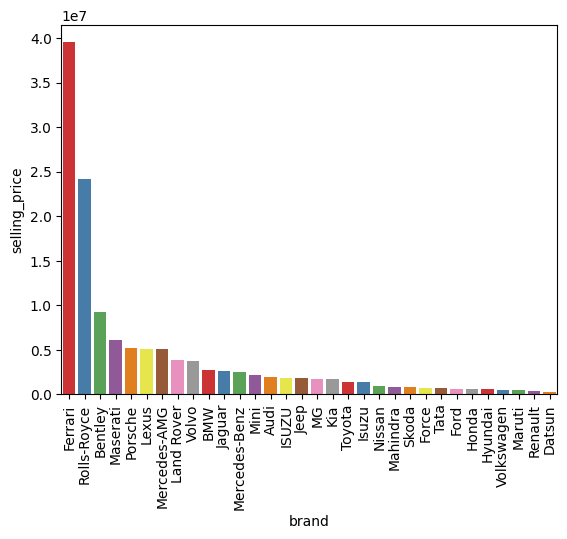

In [64]:
sns.barplot(brand_price, palette="Set1")
plt.xticks(rotation=90)

# Brand vs Km driven

In [65]:
df.groupby('brand').km_driven.mean().sort_values(ascending=False).index

Index(['Toyota', 'Isuzu', 'Mahindra', 'Land Rover', 'Skoda', 'Volkswagen',
       'Volvo', 'Force', 'Mercedes-Benz', 'Audi', 'Porsche', 'Ford', 'ISUZU',
       'Honda', 'Maruti', 'BMW', 'Hyundai', 'Tata', 'Renault', 'Jaguar',
       'Nissan', 'Jeep', 'Datsun', 'Mini', 'Lexus', 'Bentley', 'Mercedes-AMG',
       'Maserati', 'MG', 'Kia', 'Rolls-Royce', 'Ferrari'],
      dtype='object', name='brand')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31],
 [Text(0, 0, 'Toyota'),
  Text(1, 0, 'Isuzu'),
  Text(2, 0, 'Mahindra'),
  Text(3, 0, 'Land Rover'),
  Text(4, 0, 'Skoda'),
  Text(5, 0, 'Volkswagen'),
  Text(6, 0, 'Volvo'),
  Text(7, 0, 'Force'),
  Text(8, 0, 'Mercedes-Benz'),
  Text(9, 0, 'Audi'),
  Text(10, 0, 'Porsche'),
  Text(11, 0, 'Ford'),
  Text(12, 0, 'ISUZU'),
  Text(13, 0, 'Honda'),
  Text(14, 0, 'Maruti'),
  Text(15, 0, 'BMW'),
  Text(16, 0, 'Hyundai'),
  Text(17, 0, 'Tata'),
  Text(18, 0, 'Renault'),
  Text(19, 0, 'Jaguar'),
  Text(20, 0, 'Nissan'),
  Text(21, 0, 'Jeep'),
  Text(22, 0, 'Datsun'),
  Text(23, 0, 'Mini'),
  Text(24, 0, 'Lexus'),
  Text(25, 0, 'Bentley'),
  Text(26, 0, 'Mercedes-AMG'),
  Text(27, 0, 'Maserati'),
  Text(28, 0, 'MG'),
  Text(29, 0, 'Kia'),
  Text(30, 0, 'Rolls-Royce'),
  Text(31, 0, 'Ferrari')])

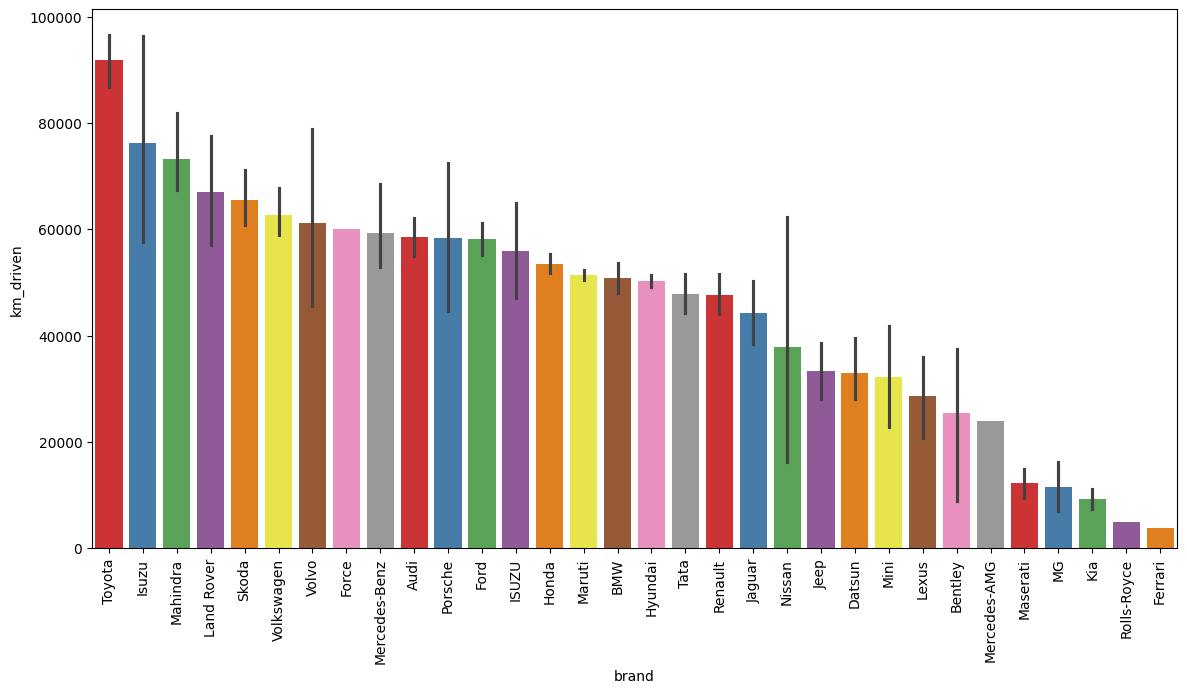

In [66]:
plt.figure(figsize=(14,7))
sns.barplot(x=df['brand'], y= df['km_driven'], palette="Set1", order=df.groupby('brand').km_driven.mean().sort_values(ascending=False).index)
plt.xticks(rotation=90)

# fuel type vs selling price


In [67]:
fuel = df.groupby('fuel_type')['selling_price'].median().sort_values(ascending=False)
fuel.to_frame()

,selling_price
fuel_type,
Electric,1857500.0
Diesel,700000.0
Petrol,460000.0
CNG,370000.0
LPG,182500.0


<Axes: xlabel='fuel_type'>

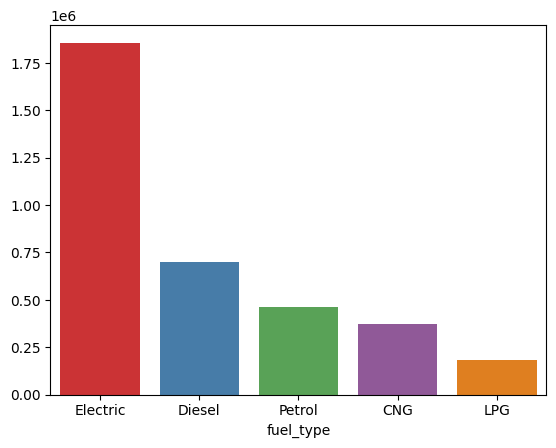

In [68]:
sns.barplot(x = fuel.index, y=fuel.values, palette="Set1")

# most sold fuel type


<Axes: xlabel='fuel_type', ylabel='count'>

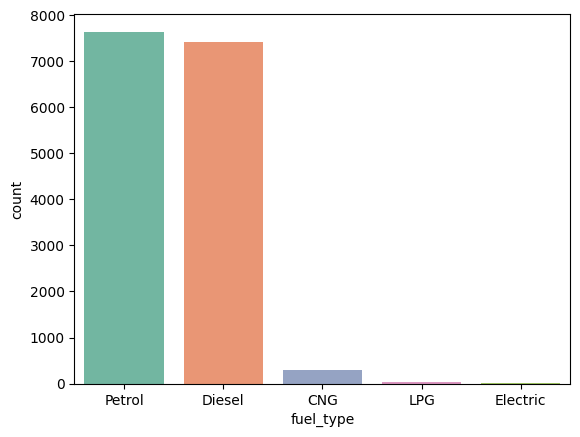

In [69]:
sns.countplot(x=df['fuel_type'], palette='Set2', order=df['fuel_type'].value_counts().sort_values(ascending=False).index)

# Fuel type vs Mileage


In [70]:
fuel_mileage = df.groupby('fuel_type')['mileage'].mean().sort_values(ascending=False)

fuel_mileage.to_frame()

,mileage
fuel_type,
CNG,25.814651
Diesel,20.060030
Electric,19.160000
Petrol,19.123045
LPG,17.836364


<Axes: xlabel='fuel_type', ylabel='mileage'>

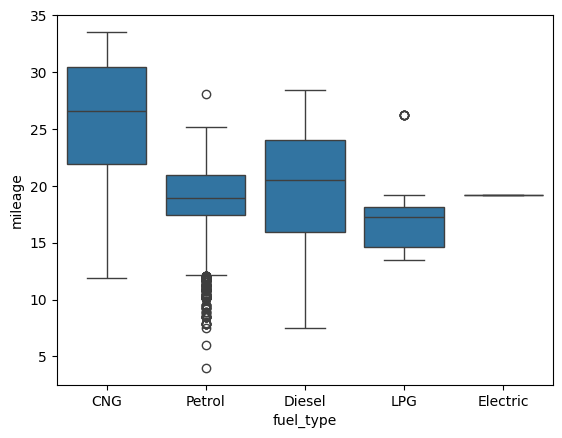

In [71]:
sns.boxplot(x= 'fuel_type', y='mileage', data = df)

# mileage vs selling price


<Axes: xlabel='mileage', ylabel='selling_price'>

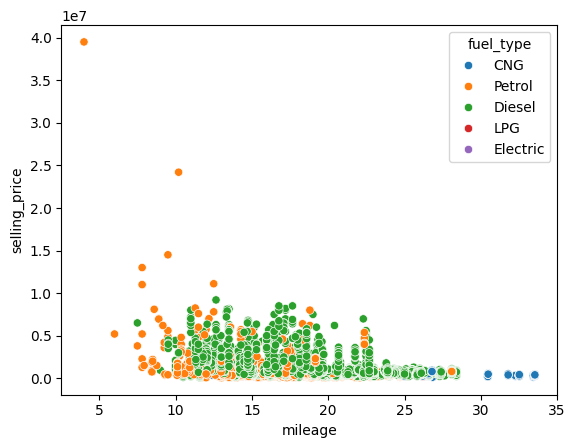

In [72]:
sns.scatterplot(x= 'mileage', y= 'selling_price', data=df,hue='fuel_type')


# Mileage distribution

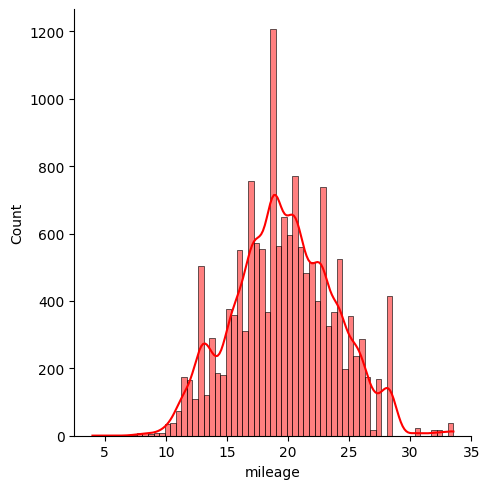

In [75]:
sns.displot(x= 'mileage',data=df, kde= True, color="red")

# vehicle age vs selling price

<Axes: xlabel='vehicle_age', ylabel='selling_price'>

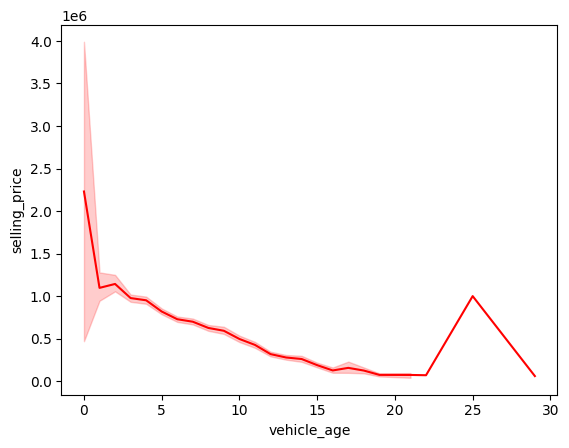

In [76]:
sns.lineplot(x= 'vehicle_age', y= 'selling_price', data=df, color= 'red')


# vehicle age vs mileage


In [77]:
vehicle_age =  df.groupby('vehicle_age')['mileage'].median().sort_values(ascending=False)
vehicle_age.to_frame().head()

,mileage
vehicle_age,
29,22.05
0,21.70
3,21.21
4,20.63
5,20.51


<Axes: xlabel='vehicle_age', ylabel='mileage'>

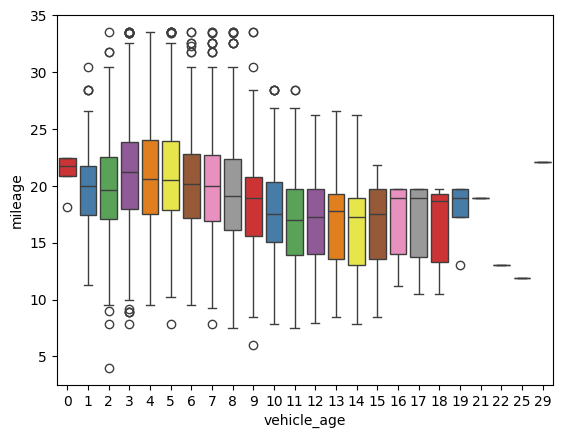

In [78]:
plt.subplots(figure=(14,7))
sns.boxplot(x=df['vehicle_age'], y=df['mileage'], palette='Set1')

# transmission type vs selling price

<Axes: xlabel='transmission_type', ylabel='selling_price'>

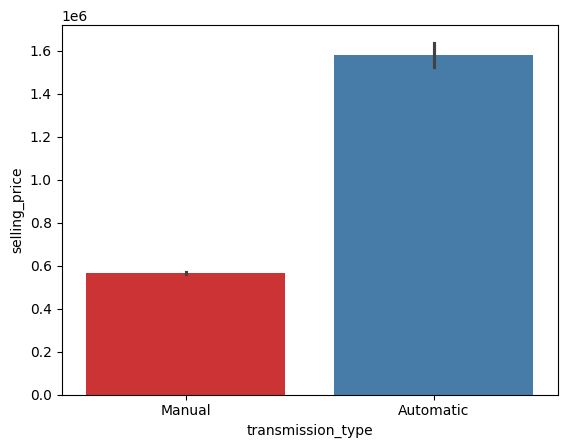

In [79]:
plt.subplots(figure=(14,7))
sns.barplot(x=df['transmission_type'], y=df['selling_price'], data=df, palette="Set1")


# transmission type vs mileage

<Axes: xlabel='transmission_type', ylabel='mileage'>

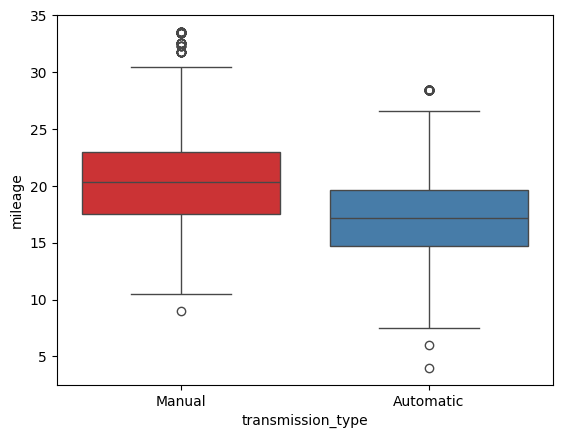

In [80]:
plt.subplots(figure=(14,7))
sns.boxplot(x=df['transmission_type'], y=df['mileage'], data=df, palette="Set1")


# transmission type vs count

<Axes: xlabel='transmission_type', ylabel='count'>

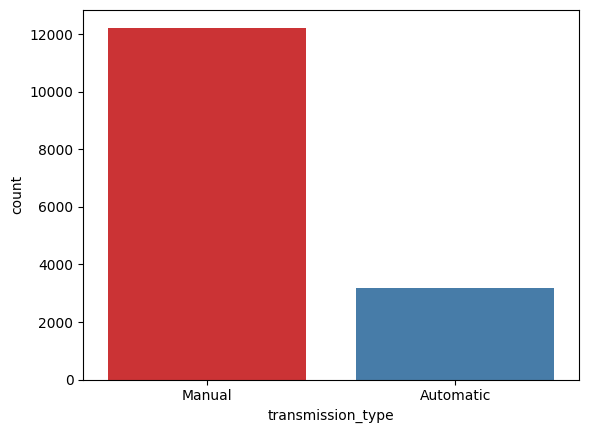

In [81]:
plt.subplots(figure=(14,7))
sns.countplot(x='transmission_type', data=df, palette="Set1")


# seller type vs count

<Axes: xlabel='seller_type', ylabel='count'>

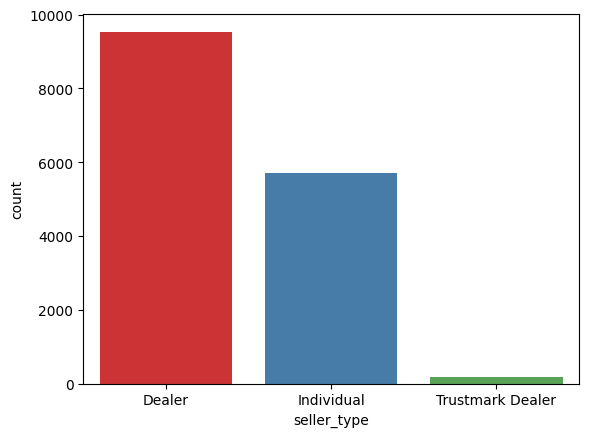

In [82]:
plt.subplots(figure=(14,7))
sns.countplot(x='seller_type', data=df, palette="Set1")


# seller type vs selling price

In [83]:
dealer = df.groupby('seller_type')['selling_price'].median().sort_values(ascending=False)
dealer.to_frame()

,selling_price
seller_type,
Dealer,591000.0
Trustmark Dealer,540000.0
Individual,507000.0


Text(0, 0.5, 'Median Selling Price')

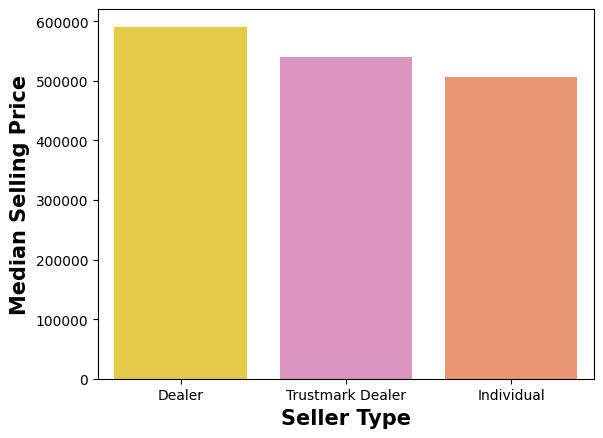

In [84]:
plt.subplots(figure=(14,7))
sns.barplot(x=dealer.index, y =dealer.values,palette="Set2_r")
plt.xlabel("Seller Type", weight="bold", fontsize= 15)
plt.ylabel("Median Selling Price", weight="bold", fontsize= 15)

# Final report


- The datatypes and columns names were right and there was 15411 rows and 13 columns.
- The selling price column is the target to predict i.e. Regression Problem
- There are outliers in the km_driven, engine, selling_price and max power
- Dealers are the highest sellers of the used cars.
- Skewness were found in few columns will be checked after handling the oultiers.
- vehicle age have negative effect on price.
- Manual cars are mostly sold and automatic cars has higher selling average than manual cars.
- Petrol is the most preffered vehicle of the fuel in used cars dataset, followed by diesel and LPG.

# Feature engineering

### outliers detection

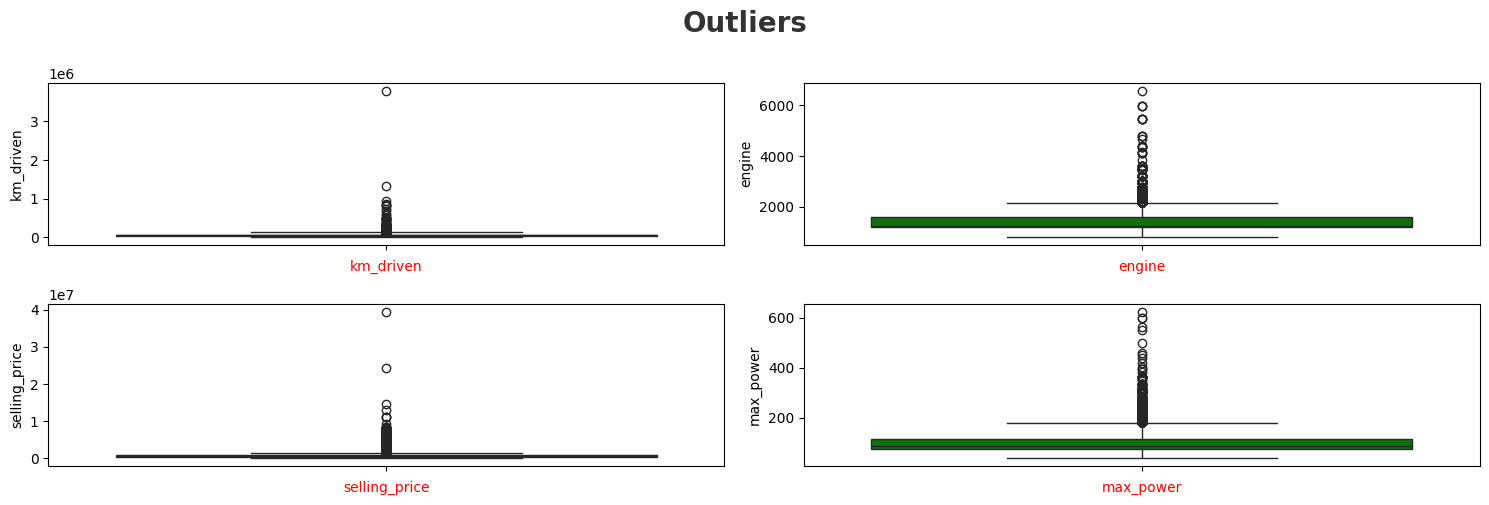

In [85]:
# Checking the Box plot after removing outliers
plt.figure(figsize=(15,5))
plt.suptitle("Outliers", fontsize=20, fontweight="bold",alpha=0.8,y=1)

outliers= ['km_driven', 'engine', 'selling_price','max_power']

for i in range(len(outliers)):
    plt.subplot(2,2,i+1)
    sns.boxplot(df[outliers[i]], color='green')
    plt.xlabel(outliers[i], color= 'r')
    plt.tight_layout()

### Outlier detection and removal using IQR

In [86]:
total_number_of_outliers_detected = []
outliers= ['km_driven', 'engine', 'selling_price','max_power']

def outlier_detection_and_removal(df1, col_name):

  print("-------------------------------------------------------------------------------\n")
  print(col_name)
  print()
  print()
  Q1 = df1[col_name].quantile(0.25)
  Q3 = df1[col_name].quantile(0.75)

  print(f"Q1={Q1}, Q3={Q3}")

  IQR = Q3 - Q1
  print(f"IQR={IQR}")

  lower_limit = Q1 - 1.5*IQR
  upper_limit = Q3 + 1.5*IQR
  print(f"lower_limit= {lower_limit}, upper_limit = {upper_limit}")

  outlier_detected = df1[(df1[col_name]<lower_limit) | (df1[col_name]>upper_limit)]
  total_number_of_outliers_detected.append(len(outlier_detected))
  #print(outlier_detected)

  df1 = df1[(df1[col_name]>=lower_limit) & (df1[col_name]<=upper_limit)] # outliers removed from each column
  return df1
  #print(df1)

df1 = df.copy()
for i in outliers:

  df1 = outlier_detection_and_removal(df1, i)
  print(df1)

print(total_number_of_outliers_detected,": total outliers=>",sum(total_number_of_outliers_detected))



-------------------------------------------------------------------------------

km_driven


Q1=30000.0, Q3=70000.0
IQR=40000.0
lower_limit= -30000.0, upper_limit = 130000.0
                  car_name        brand        model  vehicle_age  km_driven  \
0              Maruti Alto       Maruti         Alto            9      53800   
1              Maruti Alto       Maruti         Alto           11      11000   
2              Maruti Alto       Maruti         Alto           11      80000   
3              Maruti Alto       Maruti         Alto           10      57000   
4              Maruti Alto       Maruti         Alto           11      72000   
...                    ...          ...          ...          ...        ...   
15406  Bentley Continental      Bentley  Continental           10      30000   
15407    Rolls-Royce Ghost  Rolls-Royce        Ghost            4       5000   
15408  Bentley Continental      Bentley  Continental            9      37500   
15409    Ferrari GTC4Lusso

In [87]:
df1

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,53800,Dealer,CNG,Manual,26.83,796,38.4,5,235000
1,Maruti Alto,Maruti,Alto,11,11000,Dealer,CNG,Manual,26.83,796,38.4,5,185000
2,Maruti Alto,Maruti,Alto,11,80000,Dealer,CNG,Manual,26.83,796,38.4,5,150000
3,Maruti Alto,Maruti,Alto,10,57000,Dealer,CNG,Manual,26.83,796,38.4,5,172000
4,Maruti Alto,Maruti,Alto,11,72000,Individual,CNG,Manual,26.83,796,38.4,5,125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12966,Toyota Innova,Toyota,Innova,11,105000,Dealer,Petrol,Manual,12.40,1998,132.0,8,675000
12967,Toyota Innova,Toyota,Innova,10,103000,Dealer,CNG,Manual,12.40,1998,132.0,8,1080000
12968,Toyota Innova,Toyota,Innova,11,92626,Dealer,Petrol,Manual,12.40,1998,132.0,8,440000
12969,Toyota Innova,Toyota,Innova,10,100000,Individual,CNG,Manual,12.40,1998,132.0,8,380000


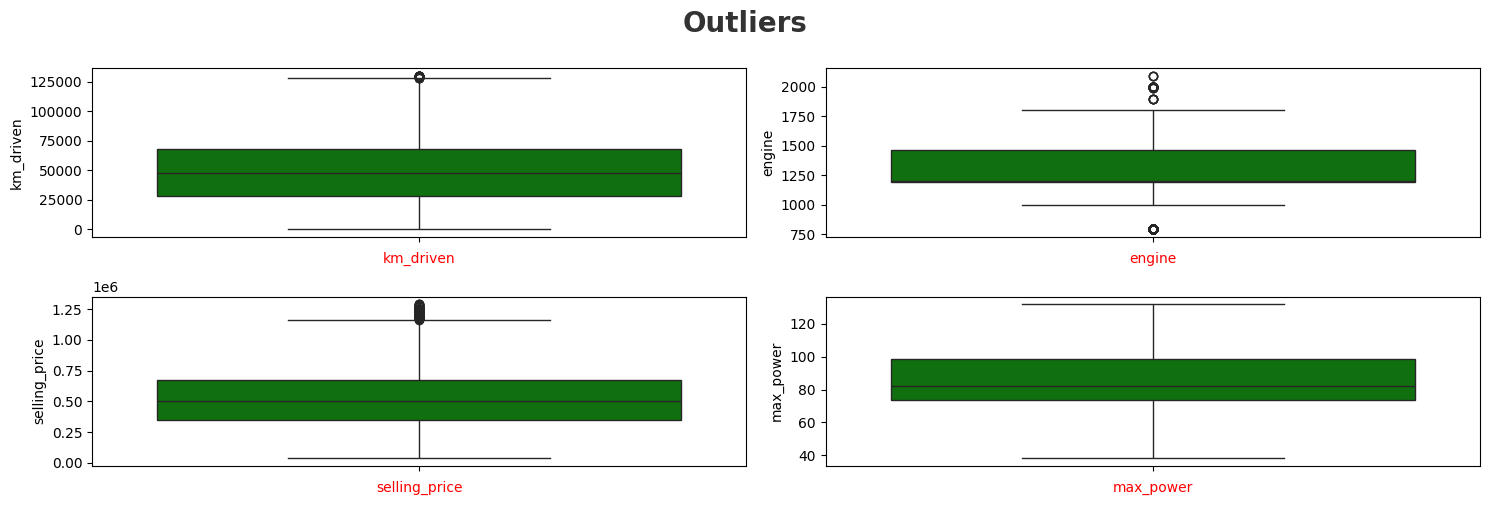

In [88]:
# Checking the Box plot after removing outliers
plt.figure(figsize=(15,5))
plt.suptitle("Outliers", fontsize=20, fontweight="bold",alpha=0.8,y=1)

outliers= ['km_driven', 'engine', 'selling_price','max_power']
# outliers= numeric_features
for i in range(len(outliers)):
    plt.subplot(2,2,i+1)
    sns.boxplot(df1[outliers[i]], color='green')
    plt.xlabel(outliers[i], color= 'r')
    plt.tight_layout()

In [89]:
df1.to_csv("cleaned_cars_dataset.csv", index=False)

### Removing unnecessary columns

In [90]:
df_model =  df.copy() # raw data
df_model

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,53800,Dealer,CNG,Manual,26.83,796,38.4,5,235000
1,Maruti Alto,Maruti,Alto,11,11000,Dealer,CNG,Manual,26.83,796,38.4,5,185000
2,Maruti Alto,Maruti,Alto,11,80000,Dealer,CNG,Manual,26.83,796,38.4,5,150000
3,Maruti Alto,Maruti,Alto,10,57000,Dealer,CNG,Manual,26.83,796,38.4,5,172000
4,Maruti Alto,Maruti,Alto,11,72000,Individual,CNG,Manual,26.83,796,38.4,5,125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,Bentley Continental,Bentley,Continental,10,30000,Dealer,Petrol,Automatic,8.60,5998,552.0,4,8100000
15407,Rolls-Royce Ghost,Rolls-Royce,Ghost,4,5000,Individual,Petrol,Automatic,10.20,6592,563.0,4,24200000
15408,Bentley Continental,Bentley,Continental,9,37500,Dealer,Petrol,Automatic,6.00,5998,600.0,5,5200000
15409,Ferrari GTC4Lusso,Ferrari,GTC4Lusso,2,3800,Dealer,Petrol,Automatic,4.00,3855,601.0,4,39500000


In [91]:
df_model.drop(labels=["car_name",'brand', 'model'], axis=1, inplace=True)

In [92]:
df_model

,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,9,53800,Dealer,CNG,Manual,26.83,796,38.4,5,235000
1,11,11000,Dealer,CNG,Manual,26.83,796,38.4,5,185000
2,11,80000,Dealer,CNG,Manual,26.83,796,38.4,5,150000
3,10,57000,Dealer,CNG,Manual,26.83,796,38.4,5,172000
4,11,72000,Individual,CNG,Manual,26.83,796,38.4,5,125000
...,...,...,...,...,...,...,...,...,...,...
15406,10,30000,Dealer,Petrol,Automatic,8.60,5998,552.0,4,8100000
15407,4,5000,Individual,Petrol,Automatic,10.20,6592,563.0,4,24200000
15408,9,37500,Dealer,Petrol,Automatic,6.00,5998,600.0,5,5200000
15409,2,3800,Dealer,Petrol,Automatic,4.00,3855,601.0,4,39500000


In [93]:
df_model.dtypes

vehicle_age            int64
km_driven              int64
seller_type           object
fuel_type             object
transmission_type     object
mileage              float64
engine                 int64
max_power            float64
seats                  int64
selling_price          int64
dtype: object

### converting categorical data to numerical

- using One Hot Encoding(get_dummies) to convert categorical data to numerical

In [94]:
df_model = pd.get_dummies(df_model, dtype='float')

In [95]:
df_model


,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual
0,9,53800,26.83,796,38.4,5,235000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,11,11000,26.83,796,38.4,5,185000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,11,80000,26.83,796,38.4,5,150000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,10,57000,26.83,796,38.4,5,172000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,11,72000,26.83,796,38.4,5,125000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,10,30000,8.60,5998,552.0,4,8100000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
15407,4,5000,10.20,6592,563.0,4,24200000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
15408,9,37500,6.00,5998,600.0,5,5200000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
15409,2,3800,4.00,3855,601.0,4,39500000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [96]:
df_model.dtypes

vehicle_age                       int64
km_driven                         int64
mileage                         float64
engine                            int64
max_power                       float64
seats                             int64
selling_price                     int64
seller_type_Dealer              float64
seller_type_Individual          float64
seller_type_Trustmark Dealer    float64
fuel_type_CNG                   float64
fuel_type_Diesel                float64
fuel_type_Electric              float64
fuel_type_LPG                   float64
fuel_type_Petrol                float64
transmission_type_Automatic     float64
transmission_type_Manual        float64
dtype: object

# creating Feature Matrix(independent Variable) & Target variable (dependent Variable)

In [97]:
X = df_model.drop('selling_price', axis= 1) # independent variable
X

,vehicle_age,km_driven,mileage,engine,max_power,seats,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual
0,9,53800,26.83,796,38.4,5,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,11,11000,26.83,796,38.4,5,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,11,80000,26.83,796,38.4,5,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,10,57000,26.83,796,38.4,5,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,11,72000,26.83,796,38.4,5,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,10,30000,8.60,5998,552.0,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
15407,4,5000,10.20,6592,563.0,4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
15408,9,37500,6.00,5998,600.0,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
15409,2,3800,4.00,3855,601.0,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [98]:
y = df_model['selling_price'] # target variable or dependent variable
y

0          235000
1          185000
2          150000
3          172000
4          125000
           ...   
15406     8100000
15407    24200000
15408     5200000
15409    39500000
15410    14500000
Name: selling_price, Length: 15411, dtype: int64

### checking important features

In [99]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X, y)

ExtraTreesRegressor()

In [100]:
print("checking for feature importance")
print("-"*50)
print(model.feature_importances_)

checking for feature importance
--------------------------------------------------
[1.74937265e-01 4.65477493e-02 6.35693977e-02 1.27964057e-01
 3.94358098e-01 1.46609607e-02 3.18878065e-03 3.94831878e-03
 2.24820492e-05 4.13071100e-05 6.77244736e-03 1.55069564e-05
 1.98449505e-06 2.35333509e-02 6.50769112e-02 7.53613833e-02]


## visualisation for feature importance

<Axes: >

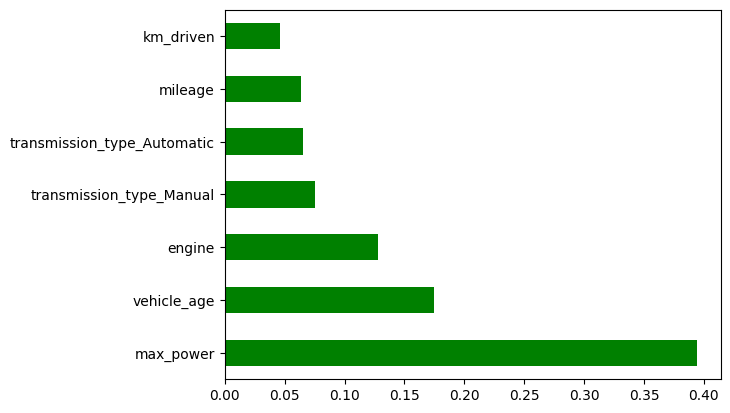

In [101]:
imp_features = pd.Series(model.feature_importances_, index = X.columns)
imp_features.nlargest(7).plot(kind='barh', color='g')

# Model Building and Evaluation

Train - test split

In [106]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### importing important libraries for Model Building

In [107]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score

In [108]:
models = [LinearRegression, SVR, DecisionTreeRegressor, RandomForestRegressor,Ridge, Lasso]

mse=[]
rmse = []
evs =[]
r_square_score = []


for model in models:
    regressor = model().fit(X_train, y_train)
    pred = regressor.predict(X_test)
    # print(pred)
    mse.append(mean_squared_error(y_true=y_test, y_pred=pred))
    rmse.append(np.sqrt(mean_squared_error(y_true=y_test, y_pred=pred)))
    evs.append(explained_variance_score(y_true=y_test, y_pred=pred))
    r_square_score.append(r2_score(y_true=y_test, y_pred=pred))

### creating DataFrame for model camparison

In [116]:
ML_model_df = pd.DataFrame({"Model":['Linear Regression', 'Support vector Regression', 'Decision Tree Regressor',\
                                      'Random Forest Regressor', 'Ridge', 'Lasso'],
                                      'Mean Squarred Error':mse,
                                      'Root mean squared error': rmse,
                                      "Explained variance Error": evs,
                                      "R-Squared Score(Accuracy)": r_square_score})

ML_model_df.set_index("Model", inplace=True)
ML_model_df

,Mean Squarred Error,Root mean squared error,Explained variance Error,R-Squared Score(Accuracy)
Model,,,,
Linear Regression,2.402725e+11,490176.039298,0.655333,0.655275
Support vector Regression,7.586265e+11,870991.679127,0.000113,-0.088419
Decision Tree Regressor,7.915822e+10,281350.706408,0.886435,0.886430
Random Forest Regressor,4.788183e+10,218819.175744,0.931313,0.931303
Ridge,2.402684e+11,490171.843659,0.655338,0.655281
Lasso,2.402722e+11,490175.639788,0.655333,0.655276


# result of model training
- RandomForest is giving best accuracy score of 93%.
- RandomForest>DecisionTree>LinearRegression>Ridge>Lasso>SVR

## Generating Pickle file - Saving Trained Model

In [110]:
import pickle

saved_models=[]

for model_class in models:
    model = model_class()
    regressor = model.fit(X_train, y_train)

    # Save the trained model to a pickle file
    model_filename = f"{model_class.__name__}_model.pkl"

    with open(model_filename, "wb") as model_file:
        pickle.dump(regressor, model_file)

    saved_models.append(model_filename)

In [111]:
saved_models

['LinearRegression_model.pkl',
 'SVR_model.pkl',
 'DecisionTreeRegressor_model.pkl',
 'RandomForestRegressor_model.pkl',
 'Ridge_model.pkl',
 'Lasso_model.pkl']

In [112]:
import pickle

with open('RandomForestRegressor_model.pkl', 'rb') as f:
    model = pickle.load(f)

In [113]:
model.score(X_train,y_train)

0.9769190803127016

In [114]:
model.score(X_test,y_test)

0.9270421904707792